<a href="https://colab.research.google.com/github/kishusingh62/dlp1/blob/main/4th_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

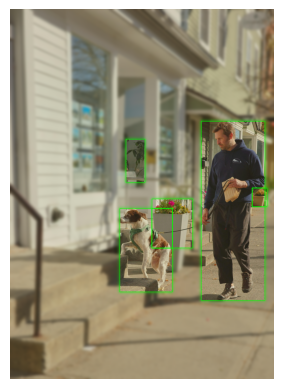

In [38]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def blur_non_detected_areas(image_path, confidence_threshold=0.5):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()
    image_tensor = F.to_tensor(image)

    with torch.no_grad():
        predictions = model([image_tensor])

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    mask = np.zeros_like(original_image, dtype=np.uint8)
    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
          label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
          score = scores[i]
          start_point = (int(box[0]), int(box[1]))
          end_point = (int(box[2]), int(box[3]))
          cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 9)
          # cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5)
          cv2.rectangle(mask, start_point, end_point, (255, 255, 255), -2)  #mask bna rhe hai jha pe object hai wha par mask ==255 uske alawa 0

    #poora image ko blurr krr de rhe hai dono values should be odd
    blurred_image = cv2.GaussianBlur(original_image, (111, 111), 0)#amount of blurr pta chlta hai usse

    #jaha bhiu mask ==255 hai wha origional image dihao else blirred image dikhao
    highlighted_image = np.where(mask == 255, original_image, blurred_image)

    return highlighted_image

if __name__ == "__main__":
    IMAGE_PATH = "/content/pexels-jason-shi-2104613-29537510.jpg"
    output_image = blur_non_detected_areas(IMAGE_PATH)

    if output_image is not None:
        output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
        plt.imshow(output_image_rgb)
        plt.axis('off')
        plt.show()
